modulating magnets lenses 0 and 1 gives a minimum at (.46,.16) modulation factors with an average survival time of 182 revolutions


In [1]:
import skopt
from smallCombinerBigMagnets import *

In [2]:
sol=compute_Sol(1e-5,500.0,30)

bounds [(0, 50), (0, 50)]
starting
0
[49, 22]
stable
[0.49, 0.22]
start lattice tracing
2.801925262299309 501.8147650859868
done lattice matching 476.86186480522156
start mode match


/home/billy/.local/lib/python3.8/site-packages/scipy/optimize/_differentialevolution.py:495: UserWarning: differential_evolution: the 'workers' keyword has overridden updating='immediate' to updating='deferred'
  warnings.warn("differential_evolution: the 'workers' keyword has"


differential_evolution step 1: f(x)= nan
differential_evolution step 2: f(x)= nan
differential_evolution step 3: f(x)= nan
differential_evolution step 4: f(x)= nan
differential_evolution step 5: f(x)= nan
differential_evolution step 6: f(x)= nan
differential_evolution step 7: f(x)= nan
differential_evolution step 8: f(x)= nan
differential_evolution step 9: f(x)= nan
differential_evolution step 10: f(x)= nan
optimal injector args: [ 0.19690601  1.32244834 -0.01464405]
done mode match 111.66876244544983
nan
nan
1
[1, 15]
1
[0, 1]
stable
[0.0, 0.01]
start lattice tracing
0.3566856907209596 23.97811015850059
done lattice matching 65.30297565460205
start mode match
differential_evolution step 1: f(x)= nan
differential_evolution step 2: f(x)= nan
differential_evolution step 3: f(x)= nan
differential_evolution step 4: f(x)= nan
differential_evolution step 5: f(x)= nan
differential_evolution step 6: f(x)= nan
differential_evolution step 7: f(x)= nan
differential_evolution step 8: f(x)= nan
dif

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

<AxesSubplot:title={'center':'Convergence plot'}, xlabel='Number of calls $n$', ylabel='$\\min f(x)$ after $n$ calls'>

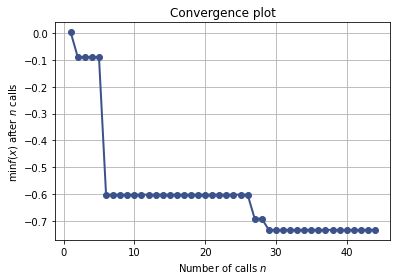

In [3]:
import skopt.plots
skopt.plots.plot_convergence(sol.skoptSol)

([46, 16], -0.7329401612784062)

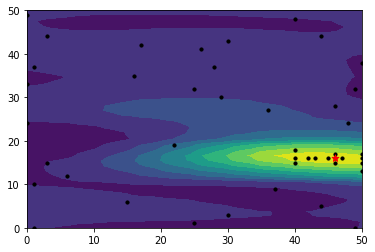

In [6]:
skopt.plots.plot_objective_2D(sol.skoptSol,0,1)
sol.skoptSol.x,sol.skoptSol.fun

3.323040682769671

In [ ]:
# %matplotlib tk
# import scipy.interpolate as spi
# x=sol.skoptSol.x_iters
# y=sol.skoptSol.func_vals
# x=np.asarray(x)
# y=np.asarray(y)
# func=sol.skoptSol.models[-6].predict#spi.Rbf(x[:,0],x[:,1],y,smooth=1e-1)#LinearNDInterpolator(x,y)

# plotxArr=np.linspace(0,1,num=250)
# plotyArr = np.linspace(0,1, num=250)
# image=np.empty((plotxArr.shape[0],plotyArr.shape[0]))
# for i in range(plotxArr.shape[0]):
#     for j in range(plotyArr.shape[0]):
#         image[j,i]=func([[plotxArr[i],plotyArr[j]]])
        
# image=np.flip(image,axis=0)
# plt.imshow(image,extent=[0,50.0,0,50.0])
# plt.scatter(x[:,0],x[:,1],s=10,c='r')
# plt.show()
# x[y.argmin()],x[y.argmax()]

In [ ]:
# lattice=get_Lattice(trackPotential=True)
# XOpt=[0.1965124968503868, 0.3353395620895592]
# lattice.elList[2].forceFact=XOpt[0]
# lattice.elList[4].forceFact = XOpt[1]
# T0=100.0*lattice.totalLength/lattice.v0Nominal

In [ ]:
# optimizer=Optimizer(lattice)
# swarm =optimizer.initialize_Random_Swarm_At_Combiner_Output(3e-3,5e0,100)
# swarm=optimizer.trace_Swarm_Through_Lattice(swarm,5e-6,T0,parallel=True,fastMode=False)

In [ ]:
# for particle in swarm.particles[:]:
#     qoArr=particle.qoArr
#     qArr=particle.qArr
#     EArr=particle.EArr
#     TArr=particle.TArr
#     VArr=particle.VArr
#     if particle.revolutions>1:
#         pass
#         #lattice.show_Lattice(particleCoords=qArr[-1])
#         #plt.plot(qoArr[:,0],TArr)
#         #plt.show()
#     print(particle.revolutions,particle.currentElIndex)

          fun: -0.8950995521068944
    func_vals: array([-0.48824975, -0.20927163, -0.05794276, -0.02496419, -0.0280472 ,
       -0.02705183, -0.03922952, -0.71615936, -0.02399886, -0.04683213,
       -0.02336252, -0.03566233, -0.02983639, -0.16460832, -0.02259678,
       -0.03348155, -0.13274054, -0.13753579, -0.029502  , -0.02688634,
       -0.07184421, -0.50711769, -0.70622311, -0.89509955, -0.87616652,
       -0.82106019, -0.88831996, -0.88758681, -0.87892057, -0.88373647,
       -0.02448901, -0.88019583, -0.84799399, -0.86545718, -0.02411522,
       -0.89414836, -0.02566425, -0.11367788, -0.46541387, -0.02172997,
       -0.28447003, -0.04774092])
       models: [GaussianProcessRegressor(kernel=1**2 * Matern(length_scale=[1, 1], nu=2.5) + WhiteKernel(noise_level=1),
                         n_restarts_optimizer=2, noise='gaussian',
                         normalize_y=True, random_state=1105611017), GaussianProcessRegressor(kernel=1**2 * Matern(length_scale=[1, 1], nu=2.5) + WhiteK